# Explicación general del cuaderno



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv(r"homeLoanAproval.csv", sep=',')
test = pd.read_csv(r"homeLoanAproval.csv", sep=',')

In [ ]:
# Pasamos a numéricas las vbles categóricas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = le.fit_transform(train[col])
        test[col] = le.fit_transform(test[col])

In [6]:
train_original = train.copy()
test_original = test.copy()

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'PropertyArea', 'LoanStatus'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'PropertyArea', 'LoanStatus'],
      dtype='object')

In [9]:
train.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
SelfEmployed           int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
LoanAmountTerm       float64
PropertyArea           int64
LoanStatus             int64
dtype: object

In [10]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (614, 12)


,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,PropertyArea,LoanStatus
0,0,1,0,0,0,0,5849,0,NaN,360.0,2,1
1,1,1,1,1,0,0,4583,43,128.0,360.0,0,0
2,2,1,1,0,0,1,3000,0,66.0,360.0,2,1
3,3,1,1,0,1,0,2583,145,120.0,360.0,2,1
4,4,1,0,0,0,0,6000,0,141.0,360.0,2,1


In [11]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (614, 12)


,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,PropertyArea,LoanStatus
0,0,1,0,0,0,0,5849,0,NaN,360.0,2,1
1,1,1,1,1,0,0,4583,43,128.0,360.0,0,0
2,2,1,1,0,0,1,3000,0,66.0,360.0,2,1
3,3,1,1,0,1,0,2583,145,120.0,360.0,2,1
4,4,1,0,0,0,0,6000,0,141.0,360.0,2,1


In [12]:
train["LoanStatus"].count()

614

In [13]:
train["LoanStatus"].value_counts()

LoanStatus
1    422
0    192
Name: count, dtype: int64

In [14]:
train["LoanStatus"].value_counts(normalize=True)*100

LoanStatus
1    68.729642
0    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'LoanStatus'}, xlabel='LoanStatus'>

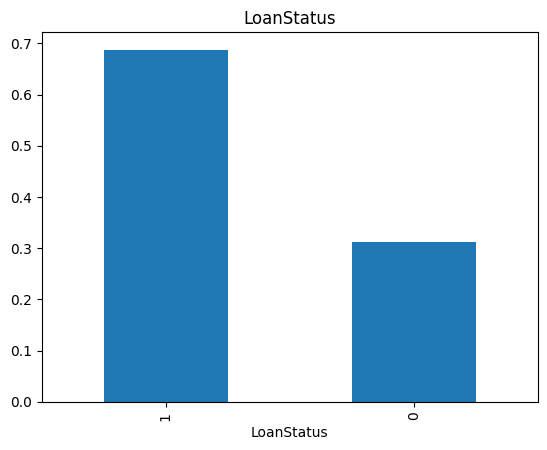

In [15]:
train["LoanStatus"].value_counts(normalize=True).plot.bar(title = 'LoanStatus')

In [16]:
train["Gender"].count()
train["Gender"].value_counts()
train['Gender'].value_counts(normalize=True)*100

Gender
1    79.641694
0    18.241042
2     2.117264
Name: proportion, dtype: float64

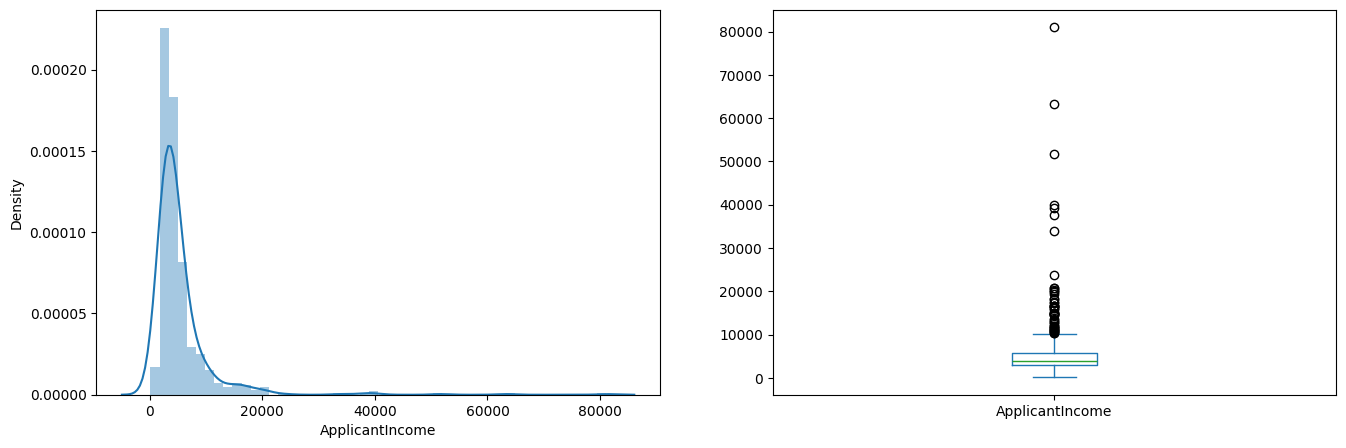

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

https://www.kaggle.com/code/sazid28/home-loan-prediction

LoanStatus    0    1
Gender              
0            37   75
1           150  339
2             5    8


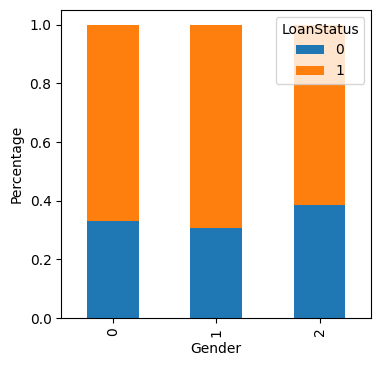

In [18]:
print(pd.crosstab(train["Gender"],train["LoanStatus"]))
Gender = pd.crosstab(train["Gender"],train["LoanStatus"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

In [19]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['LoanStatus'].replace('N', 0,inplace=True)
train['LoanStatus'].replace('Y', 1,inplace=True)

In [28]:
# Normalizamos las variables
for i in train.columns[1:]:
    train[i] = (train[i]-min(train[i]))/(max(train[i])-min(train[i]))
    

<Axes: >

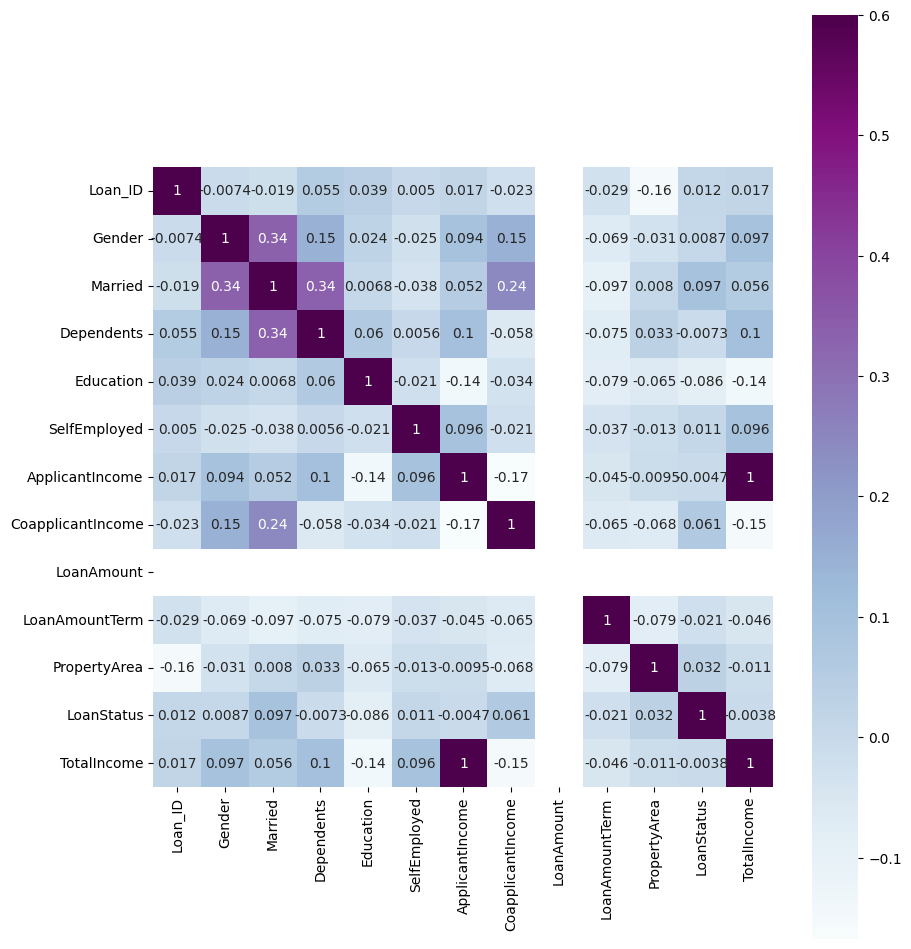

In [29]:
# selecciona solo las columnas numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = train.select_dtypes(include=numerics)

# ahora puedes calcular la correlación
matrix = newdf.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.6, square=True, cmap="BuPu",annot=True)

In [25]:
# Calculamos qué relación hay entre LoanStatus y el resto de variables, teniendo en cuenta las categóricas
train.corr()['LoanStatus'].sort_values(ascending = False)

LoanStatus           1.000000
Married              0.096657
CoapplicantIncome    0.060566
PropertyArea         0.032112
Loan_ID              0.011773
SelfEmployed         0.010880
Gender               0.008690
TotalIncome         -0.003806
ApplicantIncome     -0.004710
Dependents          -0.007318
LoanAmountTerm      -0.021268
LoanAmount          -0.037318
Education           -0.085884
Name: LoanStatus, dtype: float64

In [22]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
SelfEmployed          0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
PropertyArea          0
LoanStatus            0
dtype: int64

In [23]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [24]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]